In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

## **Figure 16. Decision Tree Structure**

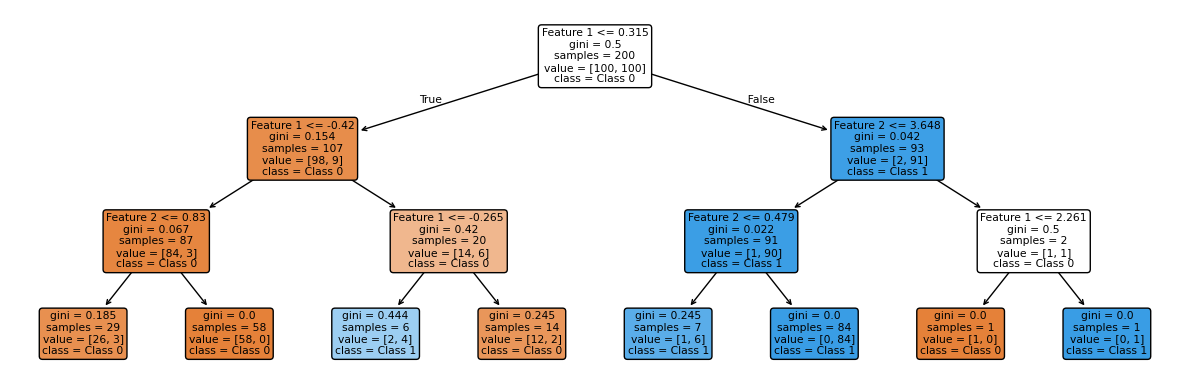

In [17]:
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.5, random_state=42)


clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 4))

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title("Decision Tree Decision Boundary (max_depth=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plot_tree(clf, filled=True, rounded=True,
           feature_names=["Feature 1", "Feature 2"],
           class_names=["Class 0", "Class 1"])
# plt.title("Decision Tree Structure")

plt.tight_layout()
plt.show()

## **Figure 17. Decision Tree with Decision Boundary**

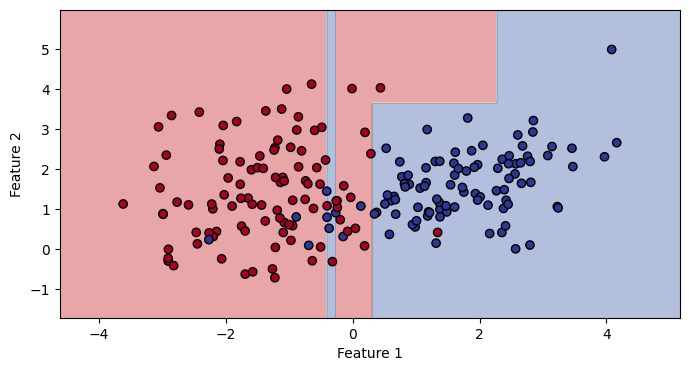

In [18]:
plt.figure(figsize=(8, 4))

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
# plt.title("Decision Tree Decision Boundary (max_depth=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## **Code Block 5.1: Decision Tree Classifier model training and tree visualization**

[*********************100%***********************]  1 of 1 completed


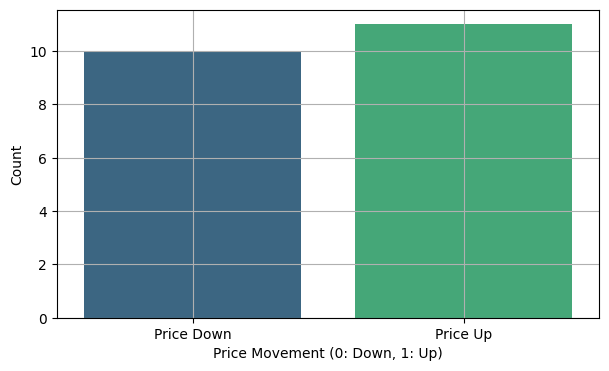

In [9]:
ticker_symbol = "TSLA"
start_date = "2023-01-01"
end_date = "2025-01-01"

stock_data = yf.download(ticker_symbol, start=start_date, end=end_date, auto_adjust=True)

stock_data['SMA_5'] = stock_data['Close'].rolling(window=5).mean()
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['Price_Up'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)
stock_data.dropna(inplace=True)

# Filter the data to the last 1 month
last_date = stock_data.index.max()
one_month_ago = last_date - pd.DateOffset(months=1)
stock_data_subset = stock_data.loc[stock_data.index >= one_month_ago].copy()

# features and target for the subset
X_subset = stock_data_subset[['SMA_5', 'SMA_20']]
y_subset = stock_data_subset['Price_Up']

price_up_counts = y_subset.value_counts().sort_index()

plt.figure(figsize=(7, 4))
sns.barplot(x=price_up_counts.index, y=price_up_counts.values, hue=price_up_counts.index, palette='viridis', legend=False)
# plt.title('Distribution of Price_Up in Last Month')
plt.xlabel('Price Movement (0: Down, 1: Up)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Price Down', 'Price Up'])
plt.grid()
plt.show()

## **Code Block 5.2: Decision Tree Structure on TSLA dataset**


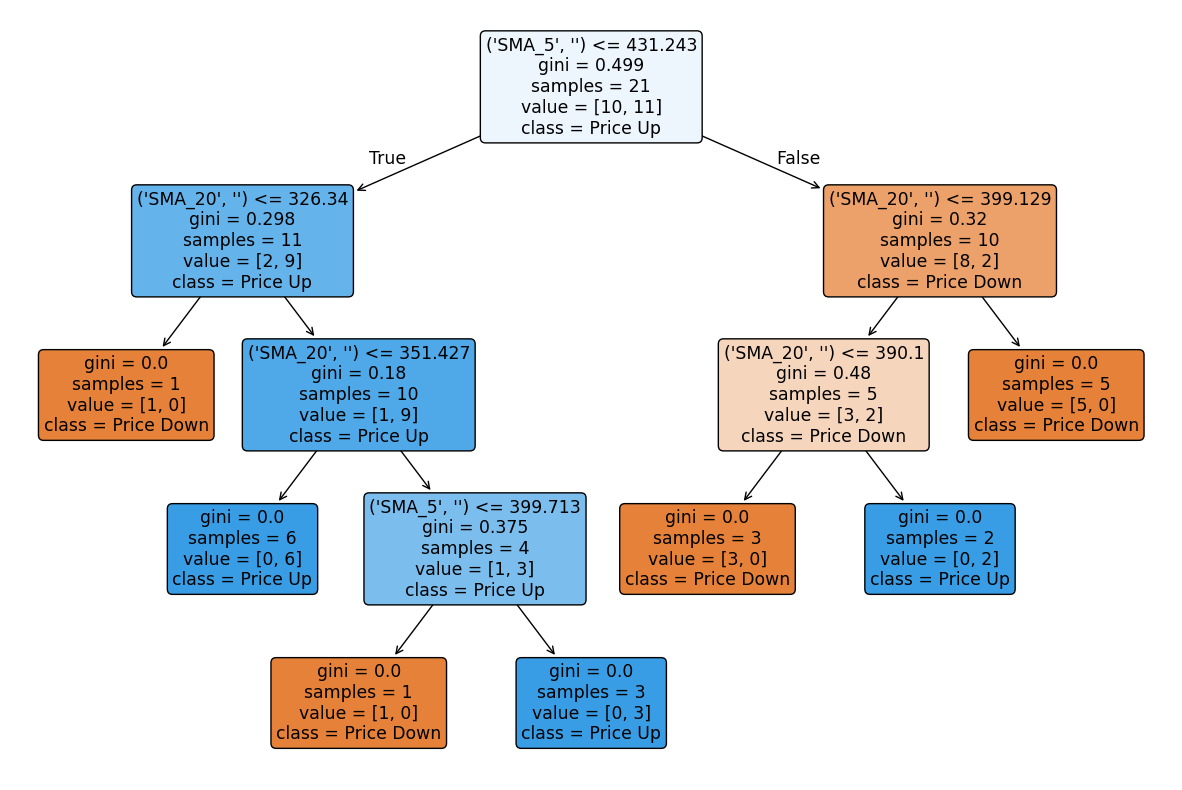

In [10]:
clf_subset = DecisionTreeClassifier(random_state=42)
clf_subset.fit(X_subset, y_subset)

plt.figure(figsize=(15, 10))
plot_tree(clf_subset, filled=True, rounded=True, feature_names=X_subset.columns.tolist(), class_names=["Price Down", "Price Up"])
# plt.title("Decision Tree Structure")
plt.show()

## **Code Block 5.3: Initialize and fit a RandomForestClassifier with 100 Trees and visualize Structure of One Decision Tree from the Random Forest**

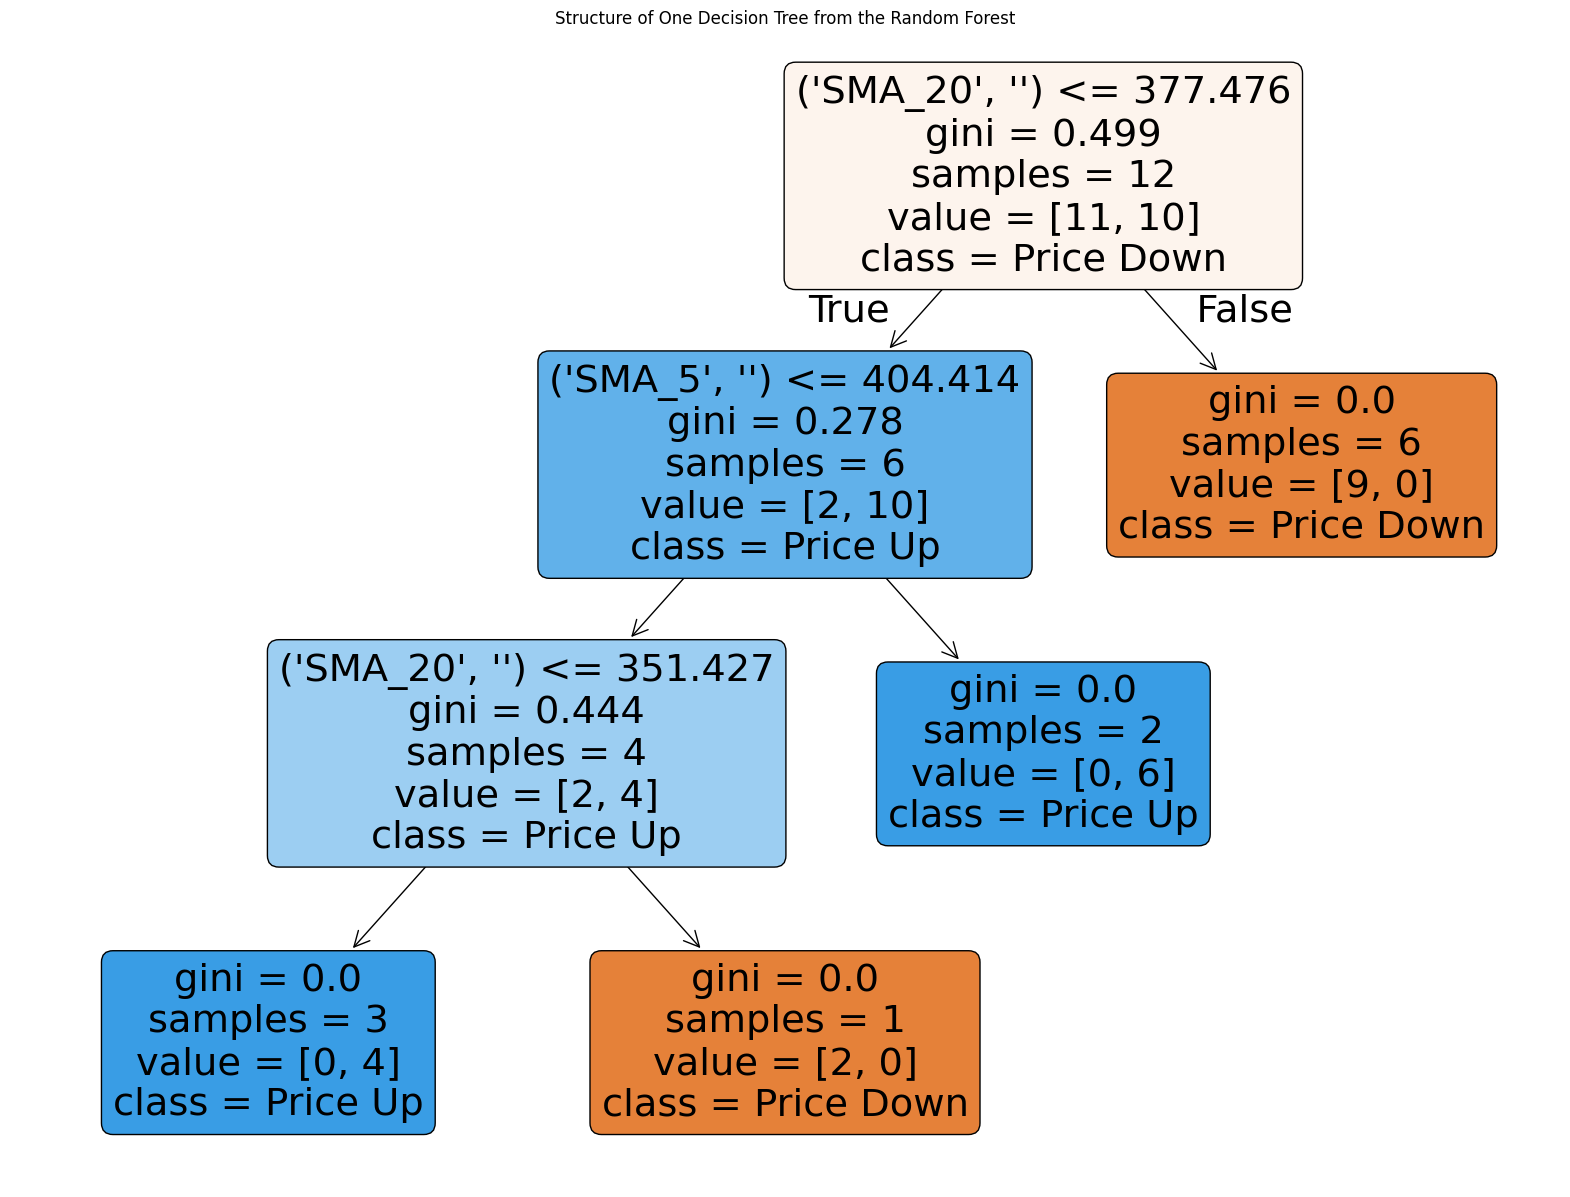

In [14]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_subset, y_subset)

one_tree = rf_clf.estimators_[0]

plt.figure(figsize=(20, 15))
plot_tree(one_tree,
          filled=True,
          rounded=True,
          feature_names=X_subset.columns.tolist(),
          class_names=["Price Down", "Price Up"])
plt.title("Structure of One Decision Tree from the Random Forest")
plt.show()

### **Figure 21. Random Forest Decision Boundary (TSLA Last Month Data)**

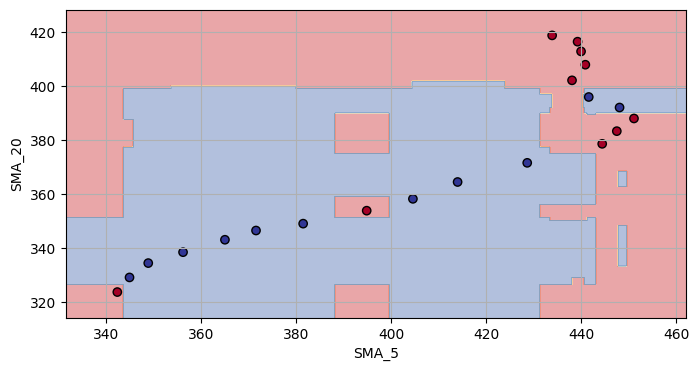

In [22]:
x_min, x_max = X_subset['SMA_5'].min() - (X_subset['SMA_5'].max() - X_subset['SMA_5'].min())*0.1, \
                 X_subset['SMA_5'].max() + (X_subset['SMA_5'].max() - X_subset['SMA_5'].min())*0.1
y_min, y_max = X_subset['SMA_20'].min() - (X_subset['SMA_20'].max() - X_subset['SMA_20'].min())*0.1, \
                 X_subset['SMA_20'].max() + (X_subset['SMA_20'].max() - X_subset['SMA_20'].min())*0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z_rf = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)

plt.figure(figsize=(8, 4))
plt.contourf(xx, yy, Z_rf, alpha=0.4, cmap=plt.cm.RdYlBu)

plt.scatter(X_subset['SMA_5'], X_subset['SMA_20'], c=y_subset, edgecolor='k', cmap=plt.cm.RdYlBu)

# plt.title('Random Forest Decision Boundary (TSLA Last Month Data)')
plt.xlabel('SMA_5')
plt.ylabel('SMA_20')
plt.grid(True)
plt.show()